In [1]:
# load packages
library(purrr)        |> suppressPackageStartupMessages()
library(Rgraphviz)    |> suppressPackageStartupMessages()
library(bnlearn)      |> suppressPackageStartupMessages()
library(bnstruct)     |> suppressPackageStartupMessages()
library(Rgraphviz)    |> suppressPackageStartupMessages()
source('K2methods.r') |> suppressPackageStartupMessages()

Warning message:
"il pacchetto 'bnlearn' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'bnstruct' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'igraph' è stato creato con R versione 4.2.3"


In [2]:
DF = data.frame(x1 = as.character(c(1, 1, 0, 1, 0, 0, 1, 0, 1, 0)), 
                x2 = as.character(c(0, 1, 0, 1, 0, 1, 1, 0, 1, 0)), 
                x3 = as.character(c(0, 1, 1, 1, 0, 1, 1, 0, 1, 0)), 
                stringsAsFactors = TRUE)
head(DF)

,x1,x2,x3
,<fct>,<fct>,<fct>
1,1,0,0
2,1,1,1
3,0,0,1
4,1,1,1
5,0,0,0
6,0,1,1


In [3]:
today = 01072023 # default seed = 12345

In [4]:
trial = K2(n = 3, u = 2, D = DF, seed = today, num.iterations = 5)
trial

Running iteration # 1 ...The Network score is -20.19397 
  Running iteration # 2 ...The Network score is -21.25837 
  Running iteration # 3 ...The Network score is -20.19397 
  Running iteration # 4 ...The Network score is -21.25837 
  Running iteration # 5 ...The Network score is -21.25837 
   DONE 

Total execution time: 0.008900332 mins


$dag
$dag[[1]]
[1] NA

$dag[[2]]
[1] 1

$dag[[3]]
[1] 2


$score
[1] -20.19397

$order
[1] "x1" "x2" "x3"

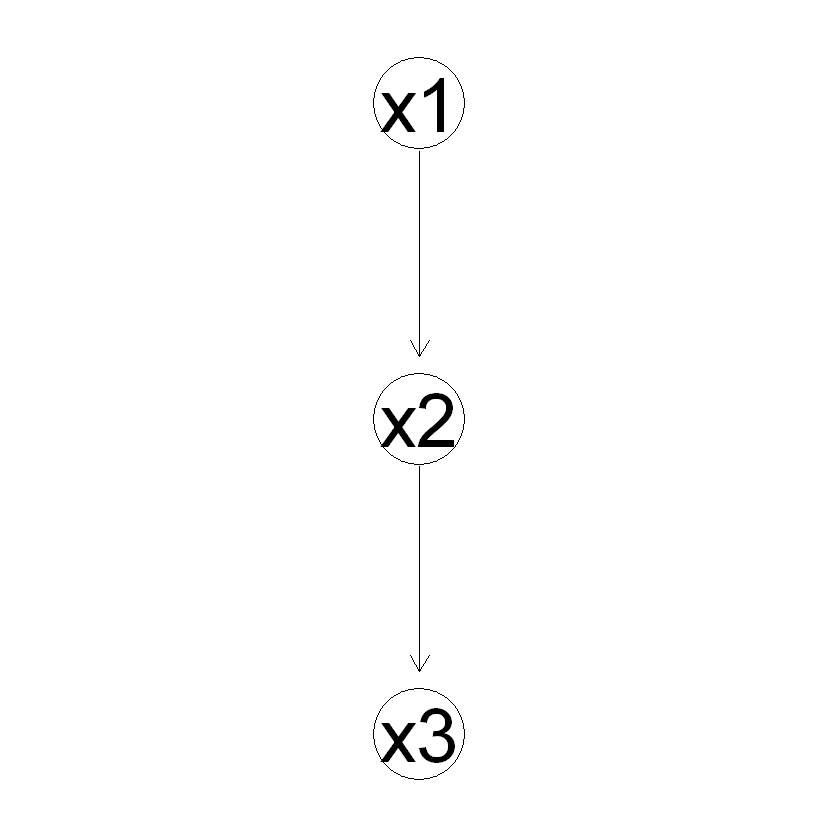

In [5]:
dag = get_dag(names(DF), trial$dag)
graphviz.plot(dag)

In [6]:
dag


  Random/Generated Bayesian network

  model:
   [x1][x2|x1][x3|x2] 
  nodes:                                 3 
  arcs:                                  2 
    undirected arcs:                     0 
    directed arcs:                       2 
  average markov blanket size:           1.33 
  average neighbourhood size:            1.33 
  average branching factor:              0.67 

  generation algorithm:                  Empty 


In [7]:
arc.strength(dag, data=DF, criterion="x2")

,from,to,strength
,<chr>,<chr>,<dbl>
1,x1,x2,0.057779571
2,x2,x3,0.009823275


## `bnlearn` comparison

In [8]:
bn_bayes = bn.fit(dag, data = DF, method = 'bayes', iss = 10)
bn_bayes


  Bayesian network parameters

  Parameters of node x1 (multinomial distribution)

Conditional probability table:
   0   1 
0.5 0.5 

  Parameters of node x2 (multinomial distribution)

Conditional probability table:
 
   x1
x2     0    1
  0 0.65 0.35
  1 0.35 0.65

  Parameters of node x3 (multinomial distribution)

Conditional probability table:
 
   x2
x3     0    1
  0 0.65 0.25
  1 0.35 0.75


Caricamento dei namespace richiesti: lattice



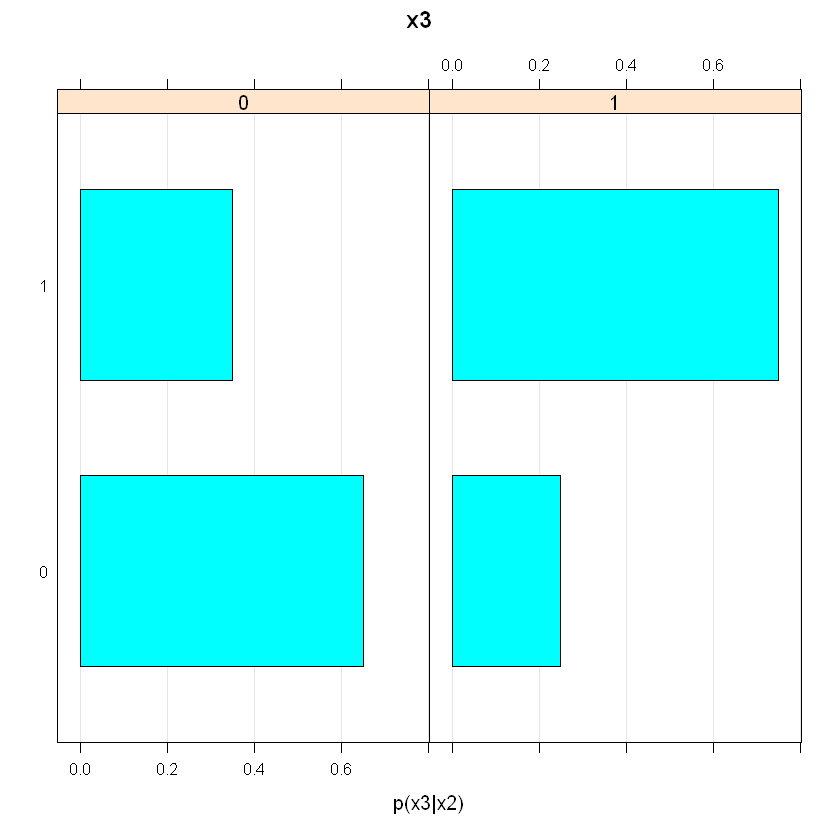

In [9]:
bn.fit.barchart(bn_bayes$x3, 'x3', xlab = 'p(x3|x2)', ylab = '')

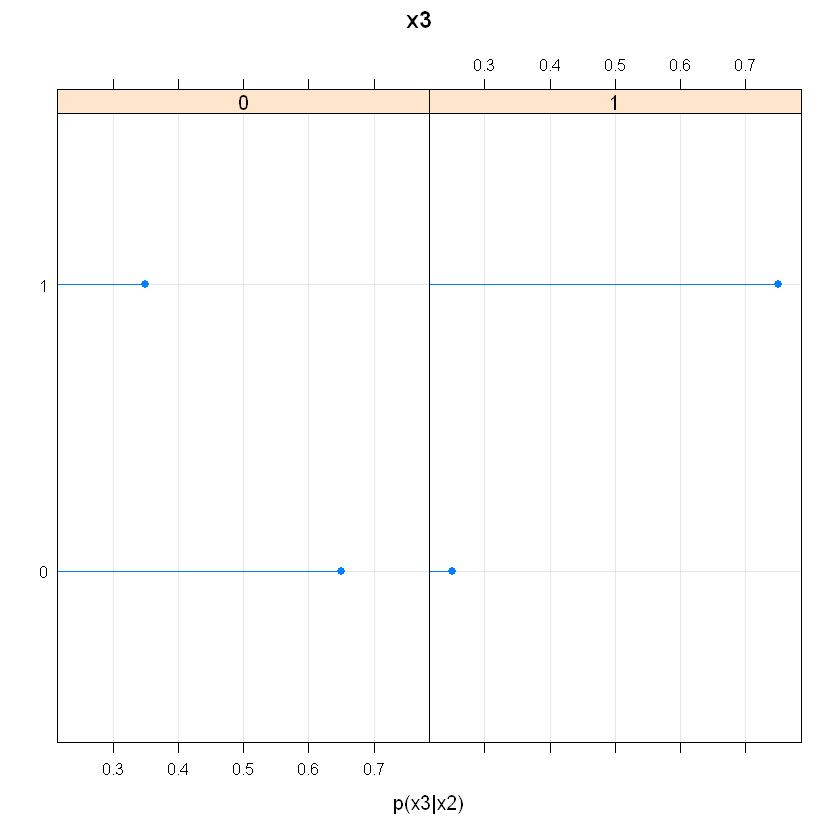

In [16]:
bn.fit.dotplot(bn_bayes$x3, 'x3', xlab = 'p(x3|x2)', ylab = '')

In [10]:
# recall that when we make this test H_0 = (x, y) are independent
ci.test(x = 'x3', y = 'x2', z = 'x1', data = DF, test = 'mi')

# this shows that since the p-value is low, by 
# taking a 5% significance level we can reject the null 
# hyp and say that x3 and x2 depend on each other


	Mutual Information (disc.)

data:  x3 ~ x2 | x1
mi = 7.2355, df = 2, p-value = 0.02684
alternative hypothesis: true value is greater than 0


In [11]:
# this may say something about the structure we got through K2
ci.test(x = 'x1', y = 'x2', z = 'x3', data = DF, test = 'mi')


	Mutual Information (disc.)

data:  x1 ~ x2 | x3
mi = 2.6341, df = 2, p-value = 0.2679
alternative hypothesis: true value is greater than 0


In [12]:
# evaluate the score of our network
score(dag, data = DF, type = 'bic')
score(dag, data = DF, type = 'bde')

[1] -20.19397

[1] -21.28154

In [13]:
learned <- hc(DF) # hill-climbing
modelstring(learned)

[1] "[x1][x2|x1][x3|x2]"

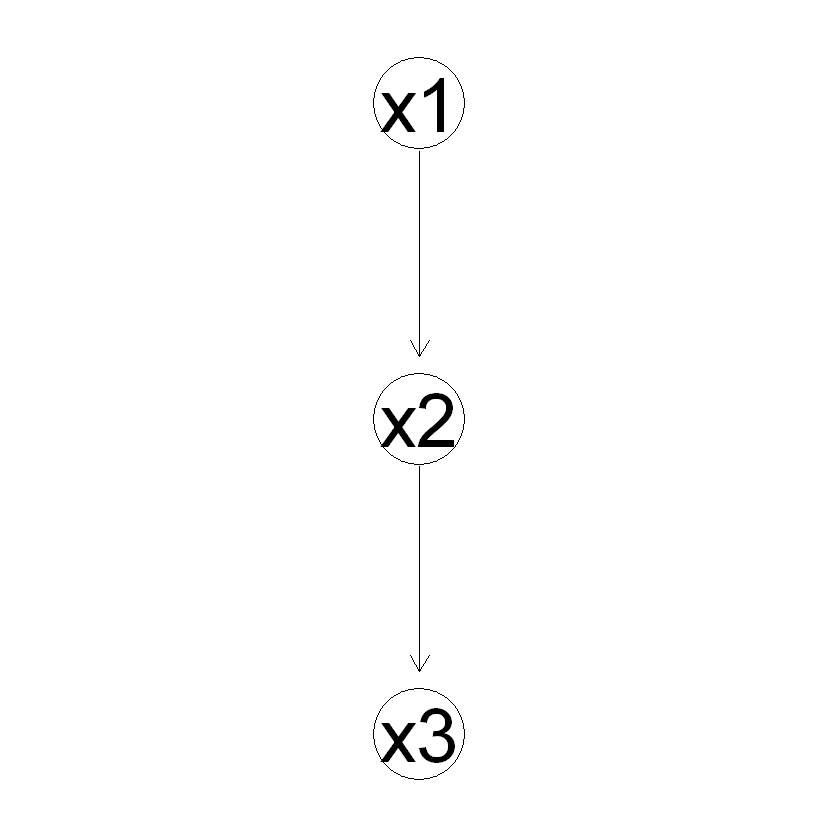

In [14]:
graphviz.plot(learned)

In [15]:
score(learned, data = DF, type = "bic")

[1] -20.19397

### This is the very same result that we get too!!! :)